# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

## 1 - Negative Transformation

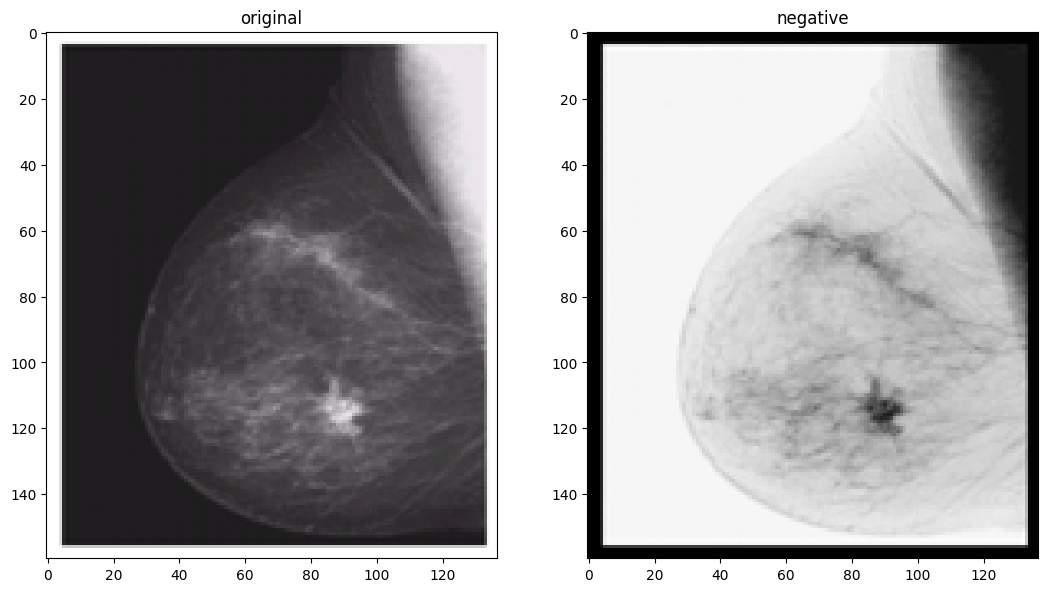

In [4]:
def negative_transform(image):
    '''
    Assumes the input image is in RGB format,
    Converts it to greyscale,
    Then apply 225 - pixel value
    '''
    rgb_image = image[:, :, :3]
    grey_image = rgb2gray(rgb_image)
    return 255 - grey_image

picture1 = io.imread("./imgs/Picture1.png")
picture1_negative = negative_transform(picture1)

show_images(images=[picture1, picture1_negative], titles=['original', 'negative'])

## 2 - Contrast Enhancement


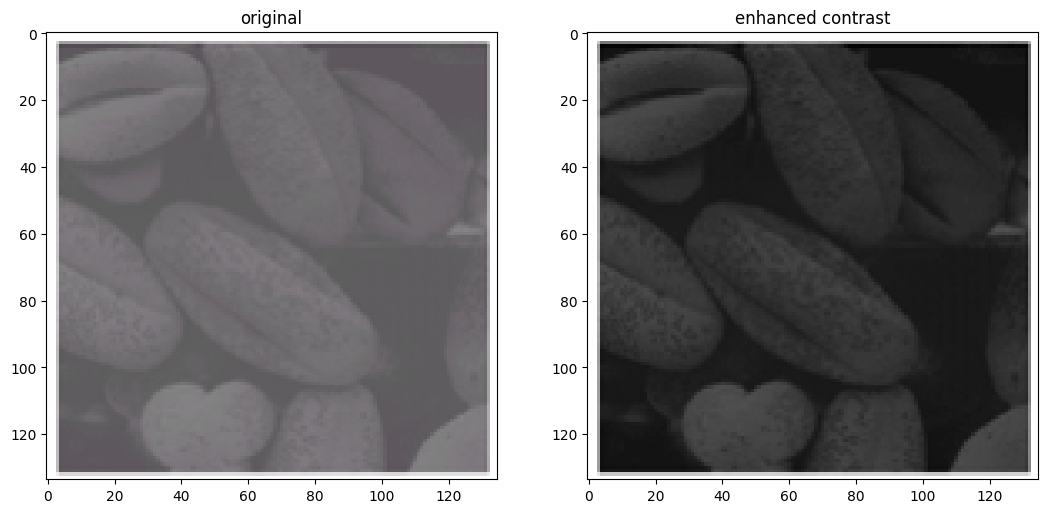

In [14]:
def enhance_contrast(image):
    '''
    Takes an rgb image, converts it to greyscale,
    Stretches the grey levels in the 
    range 0 to 100 into the range 50 to 200 and leaves other levels non changed.
    '''
    height, width, channels = image.shape
    
    rgb_image = image[:, :, :3]
    greyscale_img = rgb2gray(rgb_image)
    
    result = np.zeros_like(greyscale_img)
    for i in range(height):
        for j in range(width):
            original_pixel = greyscale_img[i][j]
            if original_pixel <= 100:
                result[i][j] = original_pixel * 1.5 + 50
            else:
                result[i][j] = original_pixel
    
    return result
    
picture2 = io.imread("./imgs/Picture2.png")
picture2_enhanced_contrast = enhance_contrast(picture2)
show_images(images=[picture2, picture2_enhanced_contrast], titles=['original', 'enhanced contrast'])

## 3 - Gamma Correction

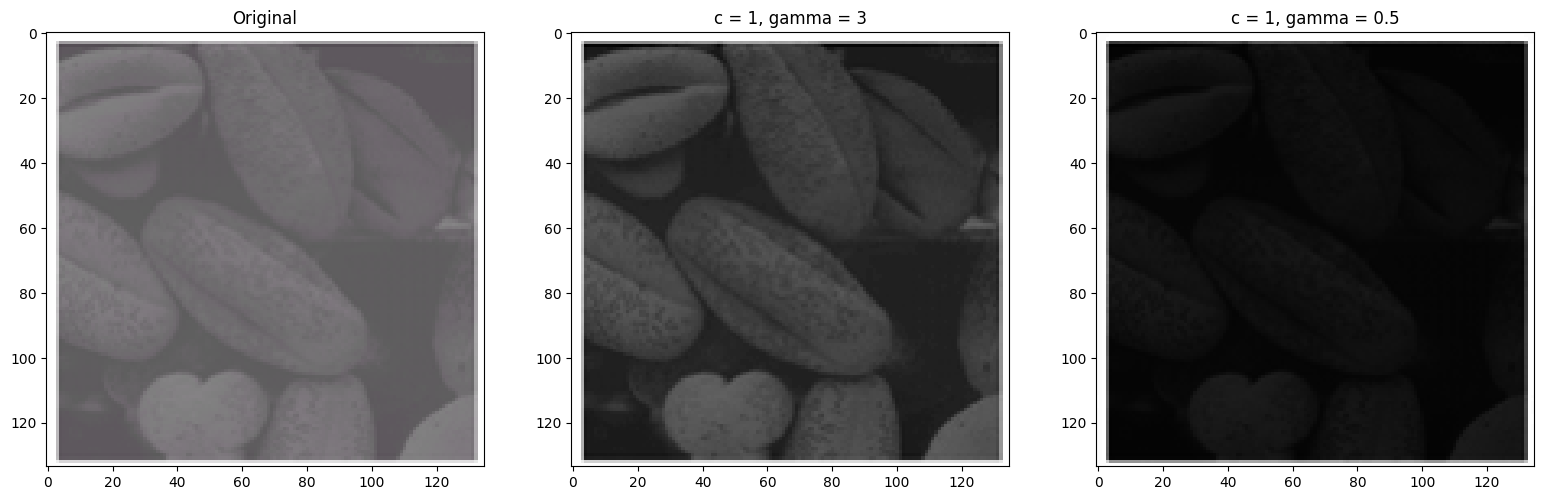

In [30]:
def correct_gamma(image, c, gamma):
    '''
    Takes rgb image, converts it to greyscale
    and then applys to each pixel the following:
    new_pixel = c * pixel ^ gamma
    '''
    height, width, channels = image.shape
    rgb_image = image[:, :, :3]
    grey_image = rgb2gray(rgb_image)
    
    result = np.zeros_like(grey_image)
    for i in range(height):
        for j in range(width):
            original_pixel = grey_image[i][j]
            result[i][j] = c * pow(original_pixel, gamma)
    
    return result

picture2_corr_1  = correct_gamma(picture2, c=1, gamma=0.5)
picture2_corr_2  = correct_gamma(picture2, c=1, gamma=3)

show_images(
    images=[picture2, picture2_corr_1, picture2_corr_2],
    titles=["Original", "c = 1, gamma = 3", "c = 1, gamma = 0.5"]
)    

## 4 - Histogram Equalization

In [194]:
# def get_greyscale(image):
    
#     if image.ndim == 2:
#         return image
    
#     if image.ndim < 3:
#         raise Exception(f"The given shape is {image.ndim}, I want 3") 
    
#     rgb_image = image[:, :, :3]
#     grey_image = rgb2gray(rgb_image)
#     grey_image = (grey_image * 255).astype(np.uint8)

def get_histogram(grey_image):
    '''
    I implemented this
    for the sake of deeper understanding
    '''
    
    counts = np.zeros(256)
    for i in range(grey_image.shape[0]):
        for j in range(grey_image.shape[1]):
            counts[grey_image[i][j]] += 1
            
    return counts.astype(int)



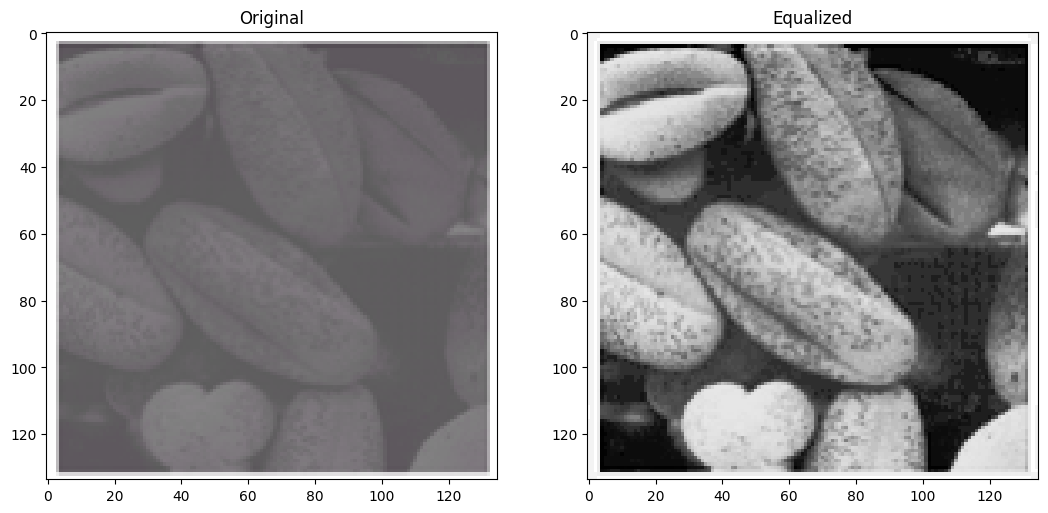

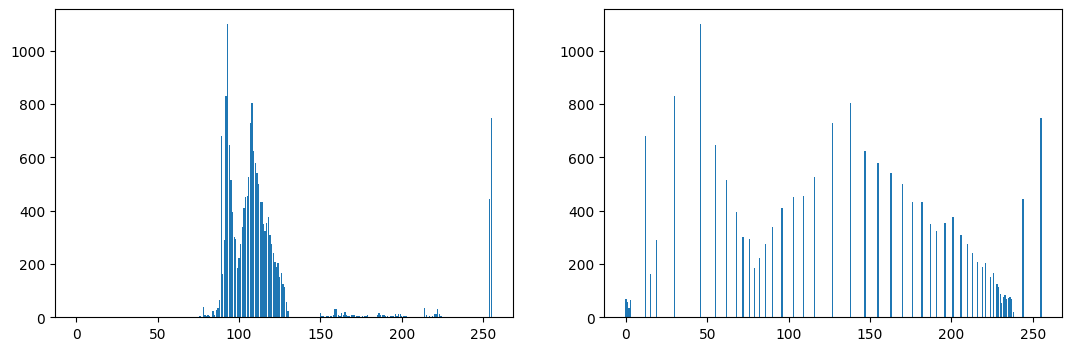

In [199]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    pass

def equalize_histogram(image):
    '''
    takes an imput rgb image, converts it to greyscale
    then gets its histogram
    ''' 
    height, width, channels = image.shape
    
    
    rgb_image = image[:, :, :3]
    grey_image = rgb2gray(rgb_image)
    grey_image = (grey_image * 255).astype(np.uint8)
    
    H = get_histogram(grey_image)
    G = np.arange(0, 256, 1)
    H_c = np.zeros_like(H)
    H_c[0] = H[0]
    for i in range(1, len(H)):
        H_c[i] = H_c[i-1] + H[i]
        
    Q = ((len(G) - 1) * H_c / (height * width)).astype(np.uint8)
    
    output_image = np.copy(grey_image)
    
    for i in range(height):
        for j in range(width):
            p = output_image[i][j]
            output_image[i][j] = Q[p]
    
    return output_image
    
    
    
picture2 = io.imread("./imgs/Picture2.png")

picture2_equalized = equalize_histogram(picture2)

show_images(
    images=[picture2, picture2_equalized],
    titles=["Original", "Equalized"]
    )

picture2_grey = rgb2gray(picture2[:, :, :3])
picture2_grey = (picture2_grey * 255).astype(np.uint8)

original_hist = get_histogram(picture2_grey)
equalized_hist = get_histogram(picture2_equalized)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
axs[0].bar(x=np.arange(0, 256, 1), height=original_hist)
axs[1].bar(x=np.arange(0, 256, 1), height=equalized_hist)
plt.show()